### Demonstration of the K-means++ algorithm and then k-means using k-means++ initialization.

In [132]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import ListedColormap


In [133]:
#Create synthesized dataset
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], 
                   [0.5, 1]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)
print(data)

[[ 5.45835694e+00  8.65125551e+00]
 [ 7.93709091e+00 -6.29195010e+00]
 [ 4.49657112e+00 -5.85768966e+00]
 [ 7.28080035e+00 -4.03746067e+00]
 [-5.20411849e-01  6.16864288e-01]
 [ 7.82043182e+00  7.46005424e+00]
 [ 1.08237093e+00 -8.75094338e+00]
 [ 5.06399172e+00  6.32234655e+00]
 [ 1.44787749e+00 -7.97924866e+00]
 [ 5.80379868e+00 -4.76117917e+00]
 [ 4.26186296e+00  5.71198622e+00]
 [ 1.41984527e+00 -7.27022596e+00]
 [ 8.29981187e+00  6.03932363e+00]
 [-1.79013603e+00 -1.10305490e+00]
 [ 6.32956694e+00 -4.40003537e+00]
 [ 7.73868150e-01 -2.45588416e-01]
 [ 5.77403216e+00 -5.26418310e+00]
 [ 7.78987114e-01 -1.45318297e+00]
 [-9.43581258e-02 -1.35359143e-01]
 [ 5.79406297e+00  7.30196183e+00]
 [ 2.93415866e+00  7.14728379e+00]
 [ 5.55950020e+00  7.38529567e+00]
 [ 7.85241572e-01 -8.06680197e+00]
 [ 1.16131709e-02  2.25329156e-01]
 [ 6.78481094e+00  8.79017376e+00]
 [ 5.15267448e+00  6.14316438e+00]
 [ 6.06229083e+00 -4.47937869e+00]
 [ 1.81854681e+00 -6.05517001e+00]
 [-1.47748727e+00 -1

In [134]:
#Plot function to draw the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.',
                color='gray', label='data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color='red', label='next centroid')
    plt.title('Select % d th centroid' % (centroids.shape[0]))

    plt.legend()
    #plt.xlim(0, 50)
    #plt.ylim(0, 50)
    plt.show()

In [135]:
# Distance metric
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

In [136]:
#k-means++ initialization algorithm
def k_initialize(data,k):
    centroids =[]
    centroids.append(data[np.random.randint(data.shape[0]),:])
    plot(data,np.array(centroids))

    for c_id in range(k-1):
        dist = []
        for i in range(data.shape[0]):
            point = data[i,:]
            d = sys.maxsize
            
            for j in range(len(centroids)):
                temp_dist = distance(point,centroids[j])
                d = min(d, temp_dist)

            dist.append(d)
        
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist),:]
        centroids.append(next_centroid)
        dist= []
        plot(data,np.array(centroids))

    return centroids


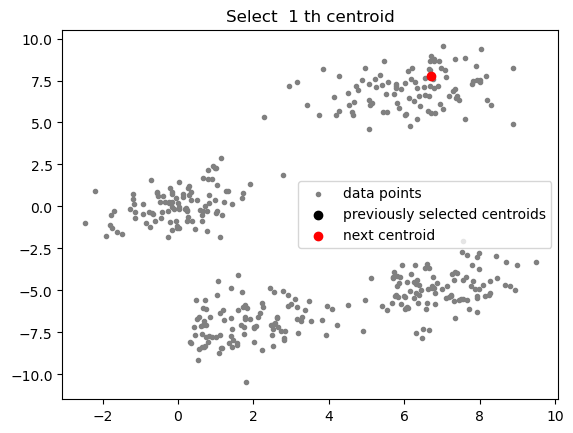

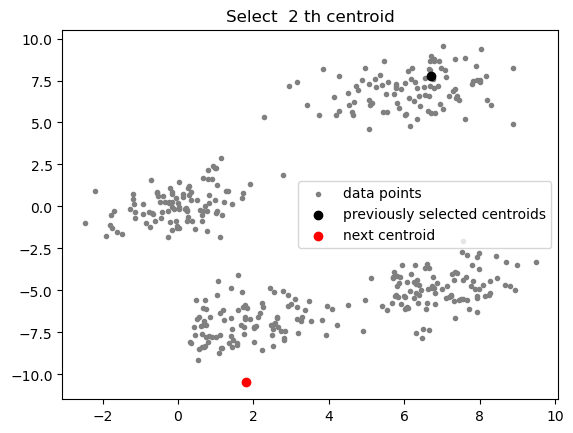

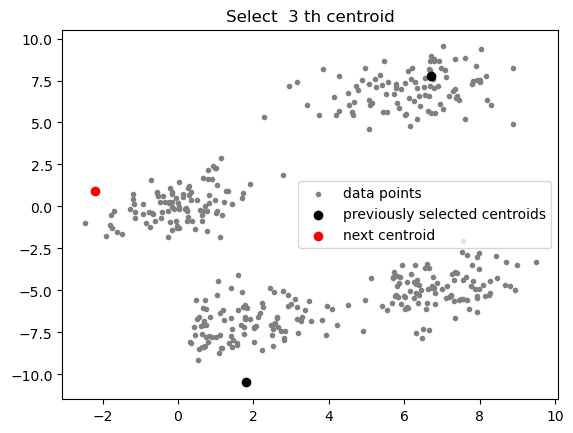

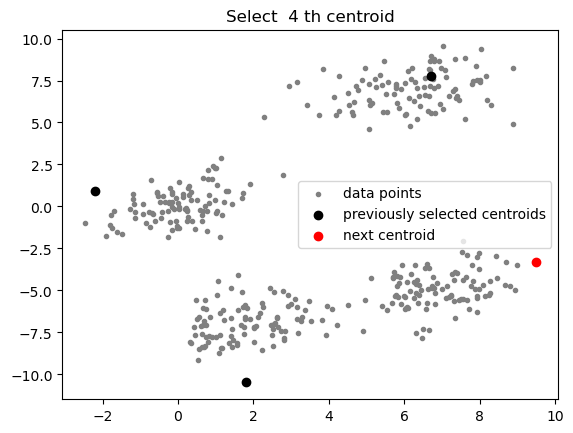

In [137]:
#Test run
centroids = k_initialize(data,k=4)

In [138]:
#Read the dataset
blobs = pd.read_csv("./data/kmeans_blobs.csv")
colnames = list(blobs.columns[1:-1])
print(colnames)
blobs.head()

['x', 'y']


,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


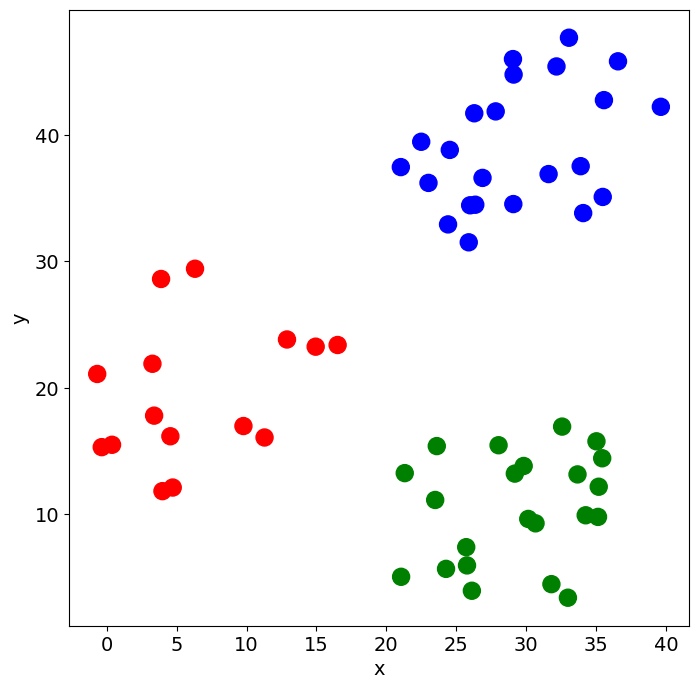

In [139]:
#Plot the dataset
customcmap = ListedColormap(["Red","Green","Blue"])
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=blobs["x"],y=blobs["y"],s=150,c = blobs["cluster"].astype('category'),cmap = customcmap)
ax.set_xlabel(r"x",fontsize=14)
ax.set_ylabel(r"y",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

[[24.412 32.932]
 [35.19  12.189]
 [26.288 41.718]
 [ 0.376 15.506]
 [26.116  3.963]
 [25.893 31.515]
 [23.606 15.402]
 [28.026 15.47 ]
 [26.36  34.488]
 [23.013 36.213]
 [27.819 41.867]
 [39.634 42.23 ]
 [35.477 35.104]
 [25.768  5.967]
 [-0.684 21.105]
 [ 3.387 17.81 ]
 [32.986  3.412]
 [34.258  9.931]
 [ 6.313 29.426]
 [33.899 37.535]
 [ 4.718 12.125]
 [21.054  5.067]
 [ 3.267 21.911]
 [24.537 38.822]
 [ 4.55  16.179]
 [25.712  7.409]
 [ 3.884 28.616]
 [29.081 34.539]
 [14.943 23.263]
 [32.169 45.421]
 [32.572 16.944]
 [33.673 13.163]
 [29.189 13.226]
 [25.994 34.444]
 [16.513 23.396]
 [23.492 11.142]
 [26.878 36.609]
 [31.604 36.911]
 [34.078 33.827]
 [11.286 16.082]
 [30.15   9.642]
 [36.569 45.827]
 [ 3.983 11.839]
 [12.891 23.832]
 [21.314 13.264]
 [29.101 44.781]
 [30.671  9.294]
 [35.139  9.803]
 [35.563 42.759]
 [35.028 15.779]
 [ 9.776 16.988]
 [24.268  5.693]
 [-0.36  15.319]
 [33.062 47.693]
 [21.034 37.463]
 [31.806  4.484]
 [22.493 39.466]
 [29.056 46.004]
 [29.822 13.83

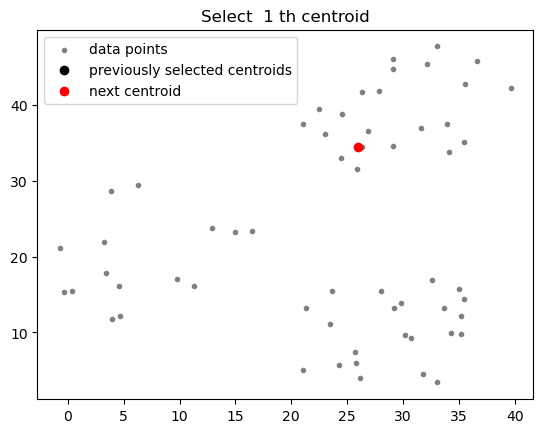

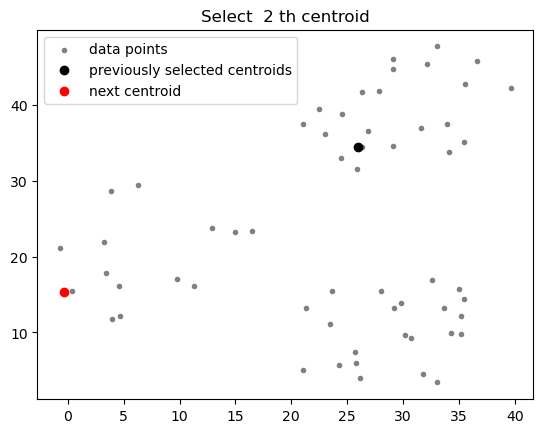

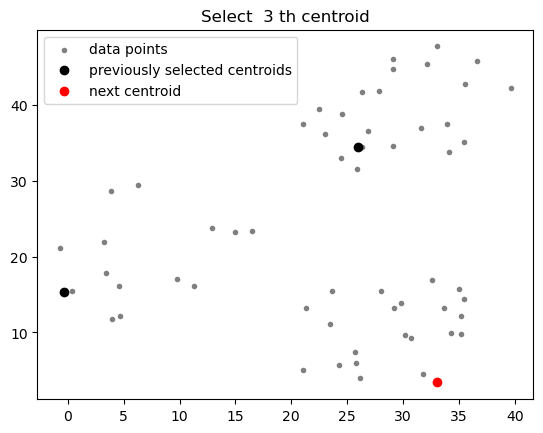

,x,y
0,25.994,34.444
1,-0.360,15.319
2,32.986,3.412


In [140]:
#Initiate k and the centroids
def initiate_centroids(data,k):
    centroids =[]
    centroids.append(data[np.random.randint(data.shape[0]),:])
    #print(centroids)
    plot(data,np.array(centroids))

    for c_id in range(k-1):
        dist = []
        for i in range(data.shape[0]):
            point = data[i,:]
            d = sys.maxsize
            
            for j in range(len(centroids)):
                temp_dist = distance(point,centroids[j])
                d = min(d, temp_dist)

            dist.append(d)
        
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist),:]
        centroids.append(next_centroid)
        dist= []
        plot(data,np.array(centroids))

    return centroids

k = 3
df = blobs[['x','y']]
print(np.array(df))
centroids = pd.DataFrame(initiate_centroids(np.array(df),k))
centroids.columns=['x','y']
centroids

In [141]:
#Calculate the similarity value which is the euclidean distance
def rserr(a,b):
    return np.square(np.sum((a-b)**2))

In [142]:
#Write the centroid assignment 
def centroid_assignment(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        errors = np.array([])
        for centroid in range(k):
            err = rserr(centroids.iloc[centroid,:],dset.iloc[obs,:])
            errors = np.append(errors,err)
        
        nearest_centroid = np.where(errors==np.amin(errors))[0].tolist()[0]
        nearest_centroid_err = np.amin(errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_err)

    return assignation, assign_errors

In [143]:
#Add centroid information to dataset
df['centroid'],df['error'] = centroid_assignment(df,centroids)
df

C:\Users\deyko\AppData\Local\Temp\ipykernel_47904\2403589946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'],df['error'] = centroid_assignment(df,centroids)


,x,y,centroid,error
0,24.412,32.932,0,22.933257
1,35.190,12.189,2,6706.519955
2,26.288,41.718,0,2808.736278
3,0.376,15.506,1,0.332543
4,26.116,3.963,2,2256.297595
5,25.893,31.515,0,73.775078
6,23.606,15.402,2,53705.513280
7,28.026,15.470,2,28898.967769
8,26.360,34.488,0,0.018467
9,23.013,36.213,0,144.377575


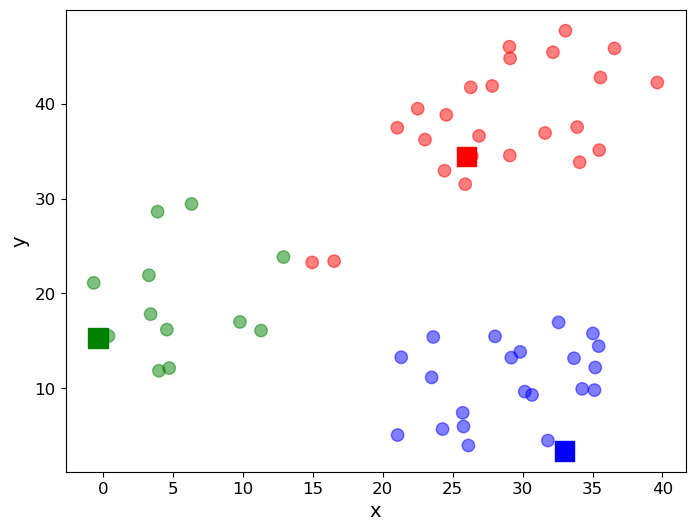

In [144]:
ig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [153]:
#The whole kmeans algorithm
def kmeans(dset, k=2, tol =1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0
    centroids = pd.DataFrame(initiate_centroids(np.array(working_dset),k))
    print(centroids)
    centroids.columns= ['x','y']

    while(goahead):
        working_dset['centroid'], j_err = centroid_assignment(working_dset, centroids) 
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1
    working_dset['centroid'], j_err = centroid_assignment(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

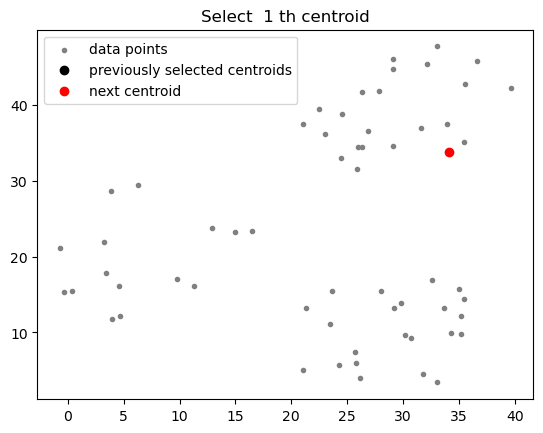

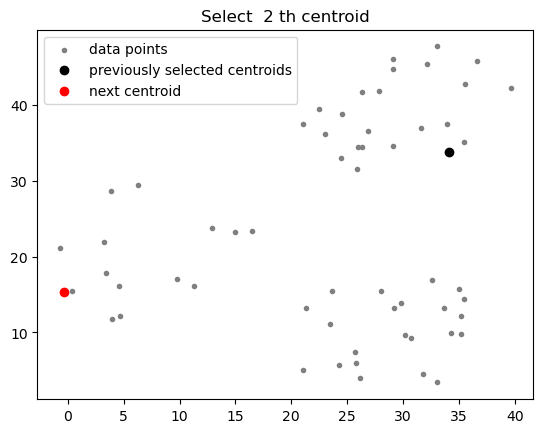

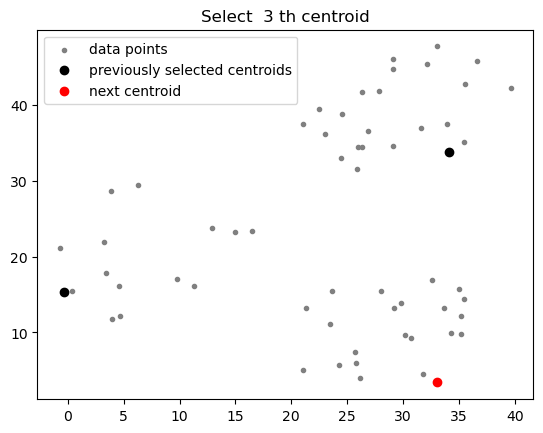

        0       1
0  34.078  33.827
1  -0.360  15.319
2  32.986   3.412


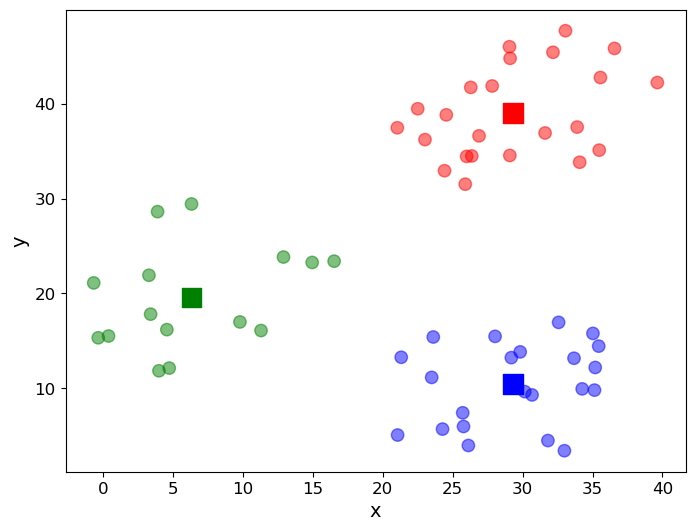

In [154]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 3)
df.head()

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()